# Preprocessing 
## Raw data is passed to text preprocessing pipeline to remove:


*   punctuation marks
*   stop words
*   lemmatization












In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import svm
import itertools
#from mlxtend.evaluate import bias_variance_decomp
import socket

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('gutenberg')

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
# list of books of the same geners (fiction book)
list_of_books=["austen-emma.txt","bryant-stories.txt","carroll-alice.txt","burgess-busterbrown.txt","edgeworth-parents.txt"]

In [ ]:
# list of authors
list_of_authors=["Jane Austen","Sara Cone Bryant","Lewis Carroll","Thornton W. Burgess","Maria Edgeworth"]

In [ ]:
#read the list of books from nltk.corpus.gutenberg.words
# the function takes the list of books and returns list of book words
def read_book(list_of_books):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  book_words=[]
  for book in list_of_books:
    
    book_words.append(nltk.corpus.gutenberg.raw(book))
  return book_words

In [ ]:
books=read_book(list_of_books)
print(books[4][0:60])

[The Parent's Assistant, by Maria Edgeworth]


THE ORPHAN


In [ ]:
# first step in cleaning the raw text is to remove the punctuation marks
# This function takes list of book words and returns list of books words without punctuation marks
def cleaning(books):
  remove_pun=[]
  tokenizer = nltk.RegexpTokenizer(r"\w+[-']*\w*")
  for b in books:
    new_words = tokenizer.tokenize(b)
    remove_pun.append(new_words)
  return remove_pun 




In [ ]:
clean_book=cleaning(books)
print(len(clean_book[0]))

159458


Plot the first 20 highest words frequency before data cleansing

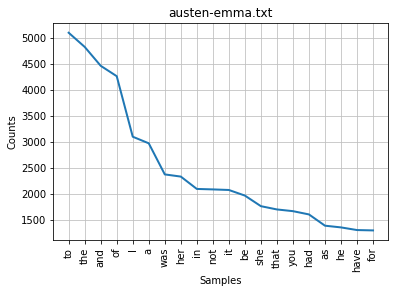

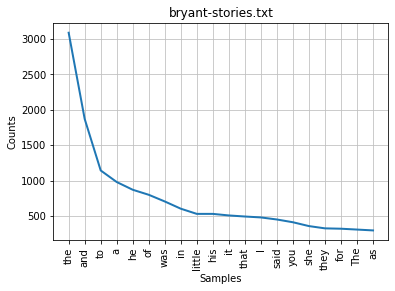

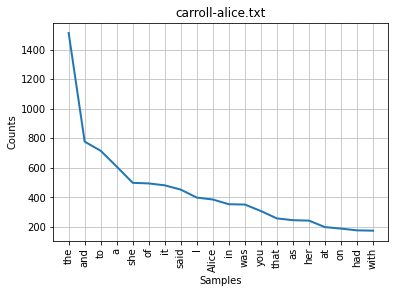

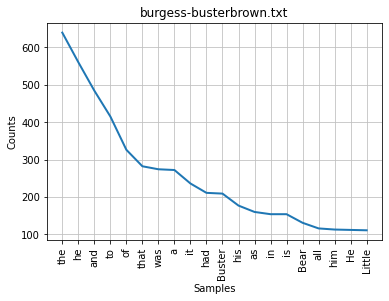

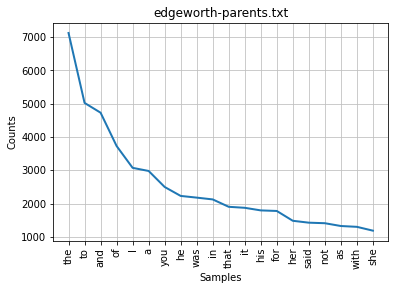

In [ ]:
#plot the hieghtest word frequency in each book before cleansing
for i in range(len(clean_book)):
  freq = nltk.FreqDist(clean_book[i])
  freq.plot(20, cumulative=False,title=list_of_books[i])

In [ ]:
#second step in cleaning raw text is to remove stop words
#remove_stopwords(clean_book):takes cleaned book without punctuation marks and returns cleaned book without stop words 
def remove_stopwords(clean_book):
  stop_words = set(stopwords.words('english')+['could','can','may','might','would','will','miss','mr','mrs','said','say','must','should'])
  removestopword=[]
  for i in clean_book:
    remove_stopword=[]
    for cb in i:
      if cb.lower() not in stop_words:
        remove_stopword.append(cb)
    removestopword.append(remove_stopword)
  return removestopword

In [ ]:
removed_stopedword=remove_stopwords(clean_book)
print(removed_stopedword[0])

['Emma', 'Jane', 'Austen', '1816', 'VOLUME', 'CHAPTER', 'Emma', 'Woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', 'youngest', 'two', 'daughters', 'affectionate', 'indulgent', 'father', 'consequence', "sister's", 'marriage', 'mistress', 'house', 'early', 'period', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'governess', 'fallen', 'little', 'short', 'mother', 'affection', 'Sixteen', 'years', 'Taylor', "Woodhouse's", 'family', 'less', 'governess', 'friend', 'fond', 'daughters', 'particularly', 'Emma', '_them_', 'intimacy', 'sisters', 'Even', 'Taylor', 'ceased', 'hold', 'nominal', 'office', 'governess', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'restraint', 'shadow', 'authority', 'long', 'passed', 'away', 'living', 'together', 'friend', 

In [ ]:
#join the tokenized words into one list  
def labeling_sentence(splitss):
  labels=[]
  for i in splitss:
    for j in i:
      labels.append(j)
  
  return labels

plot the hieghtest 20 words frequency in each book after cleansing

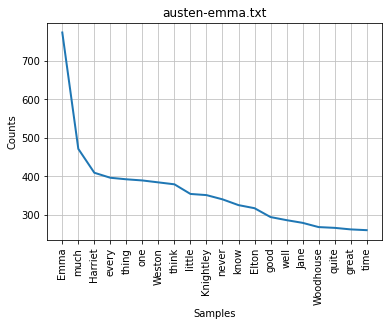

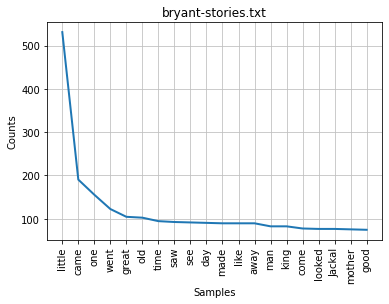

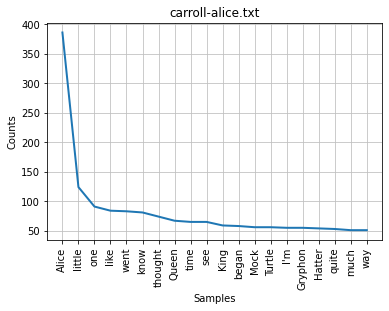

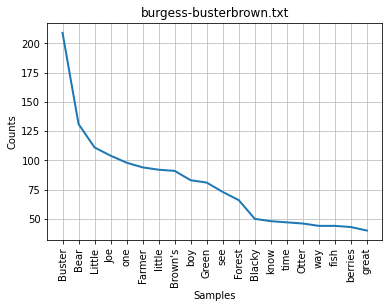

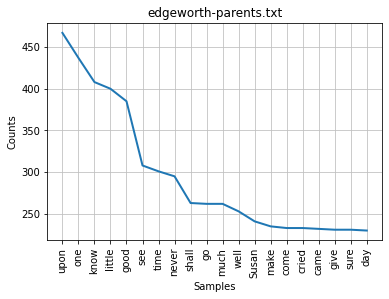

In [ ]:
  for i in range(len(removed_stopedword)):

    freq = nltk.FreqDist(removed_stopedword[i])
    freq.plot(20, cumulative=False,title=list_of_books[i])

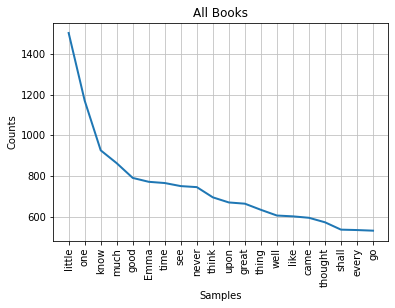

In [ ]:
#plot the hieghtest 20 words frequency in all 5 books after cleansing
freq = nltk.FreqDist(labeling_sentence(removed_stopedword))
freq.plot(20, cumulative=False,title='All Books')

Plot word cloud graphs that show which the most frequent words a book: 

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

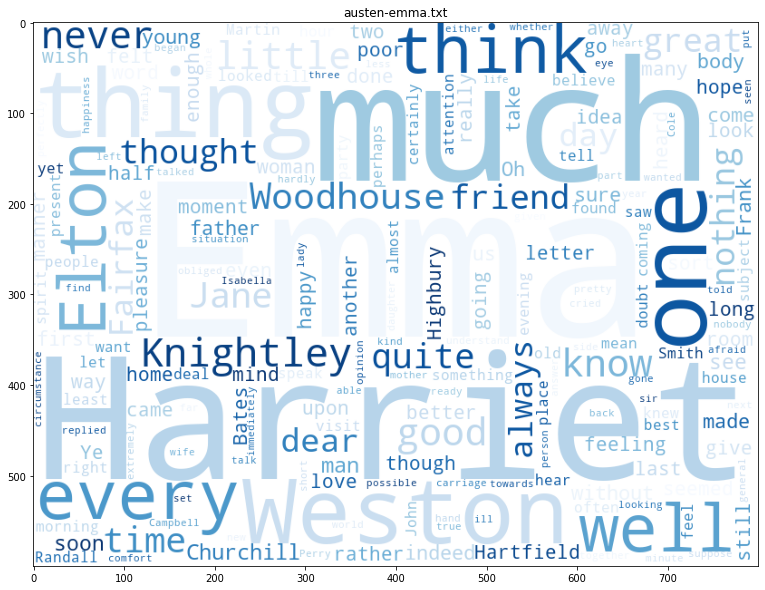

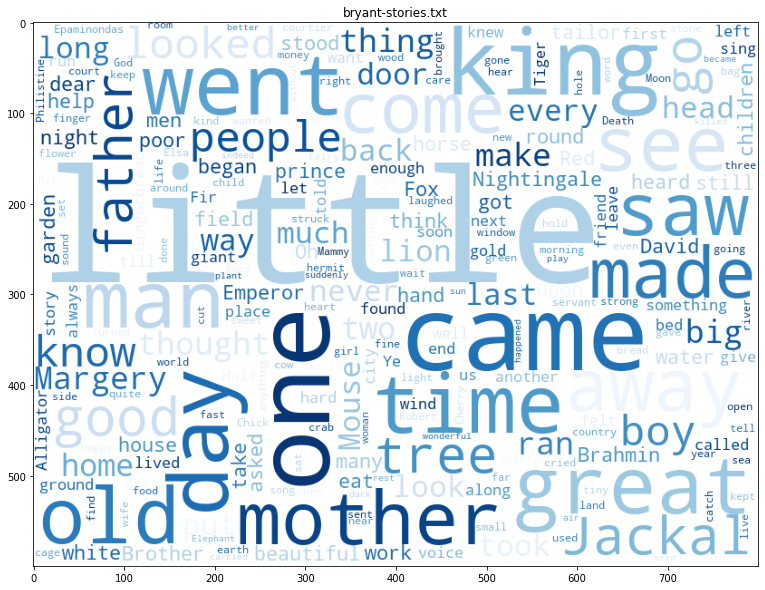

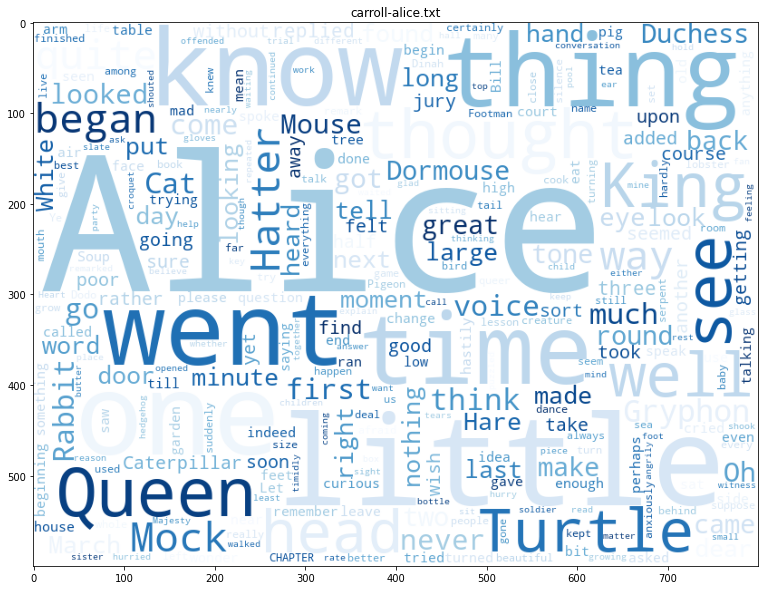

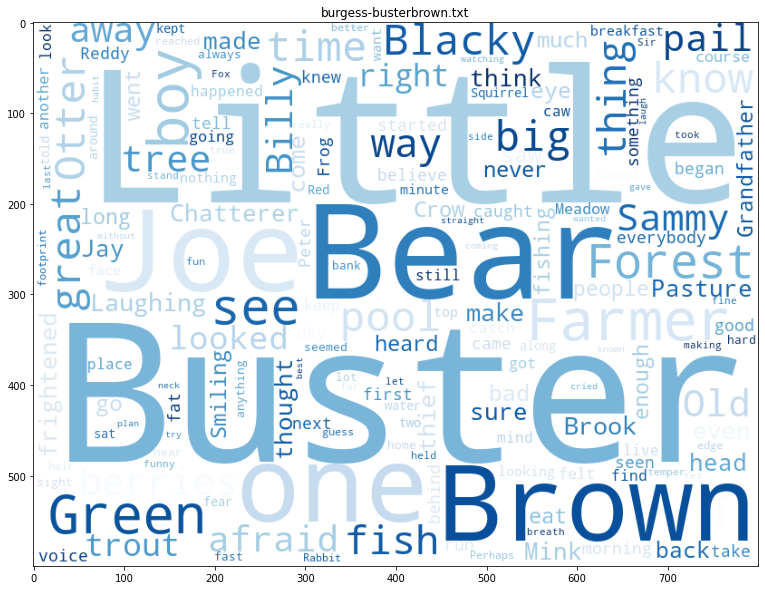

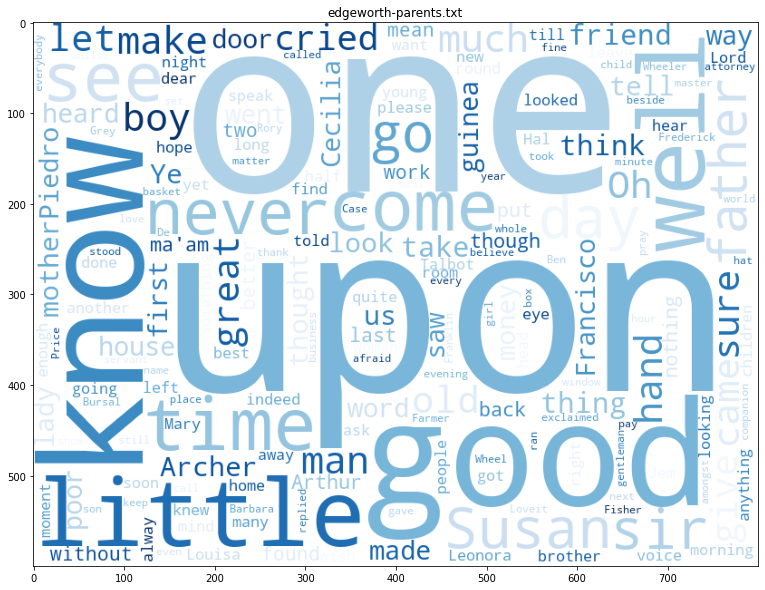

In [ ]:
#generate word cloud for each book
for i in range(len(removed_stopedword)):
  wordcloud = WordCloud(background_color='white',width=800, height=600, \
                      min_font_size=10, max_words=500, collocations=False,  colormap="Blues")
  wordcloud.generate(" ".join(removed_stopedword[i]))

  plt.figure(figsize=(15, 10))
  plt.title(list_of_books[i])
  plt.imshow(wordcloud)
  plt.show()

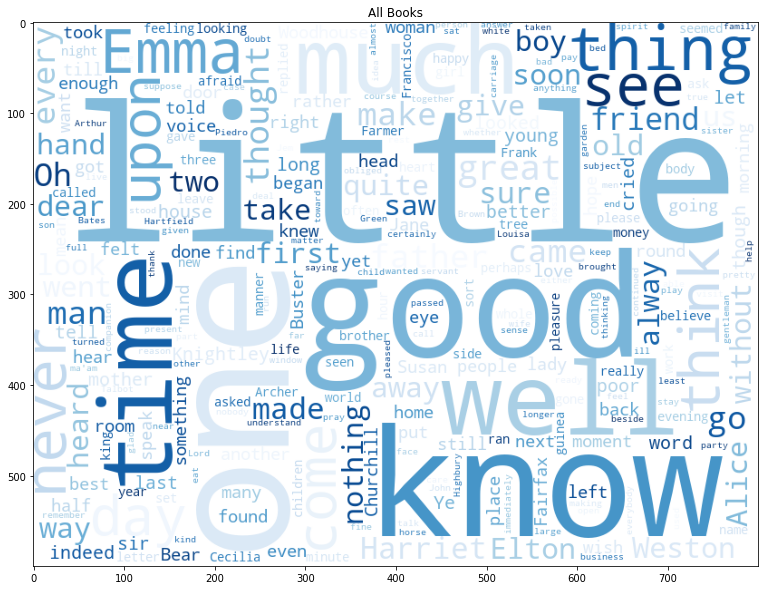

In [ ]:
#generate word cloud for all books
wordcloud = WordCloud(background_color='white',width=800, height=600, 
                      min_font_size=10, max_words=500, collocations=False,  colormap="Blues")
wordcloud.generate(" ".join(labeling_sentence(removed_stopedword)))

plt.figure(figsize=(15, 10))
plt.title("All Books")
plt.imshow(wordcloud)
plt.show()

In [ ]:
# get_wordnet_pos(word) returns the position of the word to be used in lemmatization 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def Lemmatisation_Stemming(book_lst, flg_stemm=False, flg_lemm=True):
  ll=[]
  for b in book_lst:
    lst_text=[]
  ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
      for w in b:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text.append(ps.stem(w))
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
      lemmatizer = WordNetLemmatizer()
      
      for w in b:
        lst_text.append(lemmatizer.lemmatize(w, get_wordnet_pos(w)))
    ll.append(lst_text)
    # ll.append(' '.join(lst_text))
  
  return ll



In [ ]:

def generate_random_indeces(length):
  import random
  lst = []
  for i in range(200):
    tmp = random.randint(0,length-100)
    lst.append(tmp)
  return lst

In [ ]:
def joined_sentences(sentences):
  joined = []
  for i in sentences:
    book=[]
    for w in i:
      book.append(' '.join(w))
    joined.append(book)
  return joined

In [ ]:
def join_to_sen(sentences):
  book=[]
  for i in sentences:
    for b in i :
      book.append(' '.join(b)) 
  
  return book

In [ ]:
words_num = 60
def splitting_to_words(removed_stopedword):
  books = []
  for clean_book in removed_stopedword:
    sentences=[]
    indices = generate_random_indeces(len(clean_book))
    for i in indices:
      sentences.append(clean_book[i:i+words_num])
    books.append(sentences)
  return books

In [ ]:
#labels the list of books
def labeling(list_of_authors):
  labels=[]
  for i in list_of_authors:
    for j in range(200):
      labels.append(i)
  
  return label_encoders(labels)

In [ ]:
#label encoder for the predicted column
def label_encoders(authors):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le.fit(authors)
  labeles=le.transform(authors)

  

  return labeles


In [ ]:
def dispaly_Dataframe(wsplits,splitss,list_of_authors):
  import pandas as pd
  df = pd.DataFrame()
  df['sentences'] = labeling_sentence(splitss)
  df['Words'] = labeling_sentence(wsplits)
  df['Authors_Names'] = labeling(list_of_authors)
  
  return df



In [ ]:

def function_collection(list_of_books):
  books=read_book(list_of_books)
  clean_book=cleaning(books)
  removed_stopedword=remove_stopwords(clean_book)
  lORs=Lemmatisation_Stemming(removed_stopedword)
  wsplits=splitting_to_words(lORs)
  join_words=joined_sentences(wsplits)
  return dispaly_Dataframe(wsplits,join_words,list_of_authors)


In [ ]:
books=read_book(list_of_books)
clean_book=cleaning(books)
removed_stopedword=remove_stopwords(clean_book)
lORs=Lemmatisation_Stemming(removed_stopedword)
wsplits=splitting_to_words(lORs)
join_words=joined_sentences(wsplits)
ww=join_to_sen(wsplits)
data_frame=dispaly_Dataframe(wsplits,join_words,list_of_authors)


In [ ]:
data_frame

,sentences,Words,Authors_Names
0,remarkable always hear Jane well Jane speaks d...,"[remarkable, always, hear, Jane, well, Jane, s...",0
1,Weston kiss tear joy find utterance assure pro...,"[Weston, kiss, tear, joy, find, utterance, ass...",0
2,new lady Taylor u hope well one respect induce...,"[new, lady, Taylor, u, hope, well, one, respec...",0
3,turn Emma chuse wife sure like body fix provid...,"[turn, Emma, chuse, wife, sure, like, body, fi...",0
4,render enough warm heart Service oh inexpressi...,"[render, enough, warm, heart, Service, oh, ine...",0
...,...,...,...
995,time throw carelessness touch sensibly anythin...,"[time, throw, carelessness, touch, sensibly, a...",2
996,wish Bertha-- instant female figure white appe...,"[wish, Bertha--, instant, female, figure, whit...",2
997,great noise many step hall Merciful exclaim Th...,"[great, noise, many, step, hall, Merciful, exc...",2
998,tumble-down place drove town mamma's carriage ...,"[tumble-down, place, drove, town, mamma's, car...",2


### **plotting functions**

1.   confusion matrix




In [ ]:
#plot confusion matrix
def confusion_matrix_binary_classes(y_test,y_pred):
  print(confusion_matrix(y_test, y_pred))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Naive Bayes Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(y_test,y_pred))

2. Cross validation visualization
   ref: https://www.geeksforgeeks.org/validation-curve/#:~:text=A%20Validation%20Curve%20is%20an,model%20and%20the%20model's%20score

In [ ]:
# plot the validation curve
from sklearn.model_selection import validation_curve
def plot_cv_indices(clf, X, y,param_name,parameter_range,  cv=10,model_name ="SVM"):
 
  train_score, test_score = validation_curve(clf, X, y,
                                       param_name = param_name,
                                       param_range = parameter_range,
                                        cv = cv, scoring = "accuracy",n_jobs=2)
 
# Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
  plt.title(f"Validation Curve with {model_name} Classifier")
  plt.xlabel(f"Value of {param_name}")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

In [ ]:
#padding function
def add_padding(X):
  return np.array(list(zip(*itertools.zip_longest(*X , fillvalue=0))))


In [ ]:

def SVM(X_train, y_train,X_test, y_test):
  mode_svm = svm.SVC(kernel='linear', C=3).fit(X_train, y_train)
  mode_svm.score(X_test, y_test)
  y_pred=mode_svm.predict(X_test)
  print("score = ",mode_svm.score(X_test,y_test)*100)
  confusion_matrix_binary_classes(y_test,y_pred)
  return 

In [ ]:
def KNN(X_train, y_train,X_test, y_test):
  clf = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# evaluate the performance on training data for certain model  
def plot_cross_val_scores(scores):
  plt.bar(range(1,len(scores)+1,1) , scores, width=0.5)
  

  plt.title("The score for each train-and-validation run")
  plt.xlabel("train-and-validation run")
  plt.ylabel("Score")
  plt.show()

def mesure_cross_vall(clf, X_train, y_train, cv=10):
  scores = cross_val_score(clf, X_train, y_train, cv=cv)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  print("K-fold cross validation score: fo each ",scores)
  return scores

def evaluate_bias_variance(clf, X_train, y_train, X_test, y_test):
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',random_seed=123)
  print('Average expected loss: %.3f' % avg_expected_loss)
  print('Av erage bias: %.3f' % avg_bias)
  print('Average variance: %.3f' % avg_var)

def model_evaluation(clf, X_train, y_train,cv=10):
  scores = mesure_cross_vall(clf, X_train, y_train, cv)
  #plot_cross_val_scores(scores)
  # evaluate_bias_variance(clf, X_train, y_train, X_test, y_test)

# BOW Uni_Gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
count_vect = CountVectorizer(stop_words='english')
all_records = np.array(join_words).reshape((-1,1))
BOWs = count_vect.fit_transform(all_records.ravel()).toarray()
# print(len(BOWs[0]))
BOWs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_frame['BOW'] = list(BOWs)

In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW
888,first September grand fine short signify talk ...,"[first, September, grand, fine, short, signify...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
891,lady intent upon preparation birthday celebrat...,"[lady, intent, upon, preparation, birthday, ce...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
752,Otter told Smiling Pool Farmer Brown's boy run...,"[Otter, told, Smiling, Pool, Farmer, Brown's, ...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
232,dress pinch gingerbread shoe shape put pan put...,"[dress, pinch, gingerbread, shoe, shape, put, ...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
945,power Hopkins agent friend constantly repeat g...,"[power, Hopkins, agent, friend, constantly, re...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
965,mason come give opinion room inhabit last wint...,"[mason, come, give, opinion, room, inhabit, la...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
794,try to-morrow morning early next morning Littl...,"[try, to-morrow, morning, early, next, morning...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
590,barley-sugar thing make child sweet-tempered w...,"[barley-sugar, thing, make, child, sweet-tempe...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
913,John lordship remember lordship's promise Lord...,"[John, lordship, remember, lordship's, promise...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
import itertools
X_bow = df['BOW'].to_numpy()
ybow = df.Authors_Names.to_numpy()
X_bow = add_padding(X_bow)
print (len(X_bow))
print (X_bow)
print (type(X_bow[0]))

1000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split

XBow_train, XBow_test, yBow_train, yBow_test = train_test_split(X_bow, ybow, random_state=42,test_size=0.3)
XBow_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Accuracy: 0.95 (+/- 0.06)
K-fold cross validation score: fo each  [0.9        0.95714286 0.95714286 0.94285714 1.         0.98571429
 0.92857143 0.91428571 0.94285714 0.92857143]


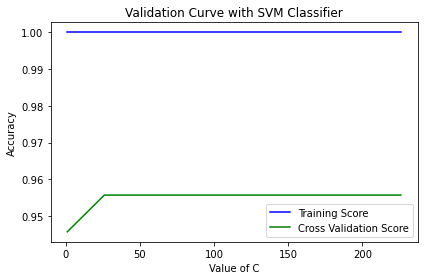

In [ ]:
from sklearn import svm
clfbow = svm.SVC()
model_evaluation(clfbow,XBow_train, yBow_train)
param_range = np.arange(1, 250, 25)
#param_range = np.logspace(-6, -1, 12)
plot_cv_indices(clfbow, XBow_train, yBow_train,"C", param_range ,  cv=10 ,model_name = "SVM")

Accuracy: 0.87 (+/- 0.09)
K-fold cross validation score: fo each  [0.9        0.97142857 0.88571429 0.81428571 0.88571429 0.87142857
 0.82857143 0.8        0.85714286 0.87142857]


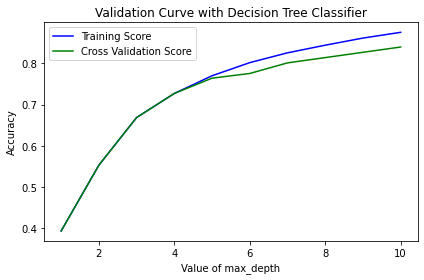

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfBow = DecisionTreeClassifier(random_state=0)
model_evaluation(clfBow,XBow_train, yBow_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfBow, XBow_train, yBow_train ,"max_depth", param_range ,  cv=10 ,model_name = "Decision Tree")

Accuracy: 0.78 (+/- 0.05)
K-fold cross validation score: fo each  [0.81428571 0.78571429 0.77142857 0.78571429 0.74285714 0.77142857
 0.75714286 0.78571429 0.81428571 0.72857143]


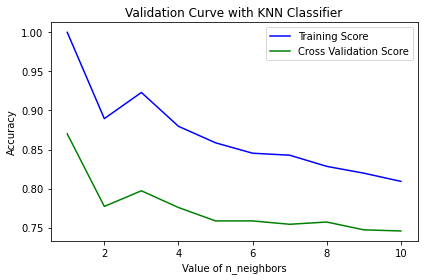

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clfbknn = KNeighborsClassifier(n_neighbors=4)
model_evaluation(clfbknn, XBow_train, yBow_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfbknn, XBow_train, yBow_train ,"n_neighbors", param_range ,  cv=10 ,model_name = "KNN")

Accuracy: 0.99 (+/- 0.03)
K-fold cross validation score: fo each  [1.         1.         0.98571429 1.         1.         0.95714286
 0.97142857 1.         0.98571429 1.        ]


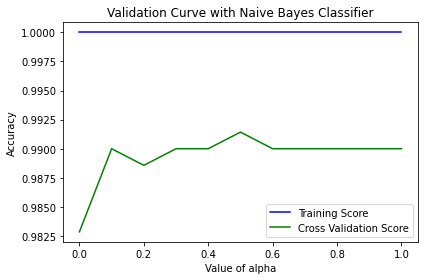

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfbw = MultinomialNB()
model_evaluation(clfbw,XBow_train, yBow_train,cv=10)
param_range = np.arange(0, 1.1, 0.1)
plot_cv_indices(clfbw,XBow_train, yBow_train ,"alpha", param_range ,  cv=10 ,model_name = "Naive Bayes")

# n-grams in BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
count_vect_ngram = CountVectorizer(ngram_range = (2, 2),stop_words='english')
all_records = np.array(join_words).reshape((-1,1))
BOWs_ngrams = count_vect_ngram.fit_transform(all_records.ravel()).toarray()
BOWs_ngrams

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
data_frame['BOW_n grams'] = list(BOWs_ngrams)

In [ ]:
data_frame

,sentences,Words,Authors_Names,BOW,BOW_n grams
0,every assurance wish settle country circle cho...,"[every, assurance, wish, settle, country, circ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,dignity grace love blooming sweetness artless ...,"[dignity, grace, love, blooming, sweetness, ar...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,write sure incapable wad however open packet s...,"[write, sure, incapable, wad, however, open, p...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,dwelt Jane Fairfax receive attention Elton nob...,"[dwelt, Jane, Fairfax, receive, attention, Elt...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,lady account give one beyond nothing-meaning t...,"[lady, account, give, one, beyond, nothing-mea...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
995,Cecilia form design propose companion give pri...,"[Cecilia, form, design, propose, companion, gi...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
996,Cecilia Cecilia prize surely Cecilia whisper e...,"[Cecilia, Cecilia, prize, surely, Cecilia, whi...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
997,pay knew honest industrious little girl trust ...,"[pay, knew, honest, industrious, little, girl,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
998,Herculaneum give young English reader acquaint...,"[Herculaneum, give, young, English, reader, ac...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW,BOW_n grams
103,manner carry walk speak silent see difference ...,"[manner, carry, walk, speak, silent, see, diff...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
320,morning beautiful BRAHMIN TIGER JACKAL know Br...,"[morning, beautiful, BRAHMIN, TIGER, JACKAL, k...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
808,Tom ask hear he'll want hear he'll cry Loveit ...,"[Tom, ask, hear, he'll, want, hear, he'll, cry...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
69,civil thing attentive muffin last night--if ha...,"[civil, thing, attentive, muffin, last, night-...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
284,food special shape see stay plant grown every ...,"[food, special, shape, see, stay, plant, grown...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
179,doubt anxiously imagine Harriet's persist plac...,"[doubt, anxiously, imagine, Harriet's, persist...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
129,bustle joy arrival many talk welcome encourage...,"[bustle, joy, arrival, many, talk, welcome, en...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59,ever since September every letter full cannot ...,"[ever, since, September, every, letter, full, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
132,dear girl walk garden suppose damp middle day ...,"[dear, girl, walk, garden, suppose, damp, midd...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
import itertools
XBOW_ngrams = df['BOW_n grams'].to_numpy()
yBOW_ngrams = df.Authors_Names.to_numpy()
XBOW_ngrams = add_padding(XBOW_ngrams)
print (XBOW_ngrams)
print (len(XBOW_ngrams[0]))
print (type(XBOW_ngrams))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
31944
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
XBOW_ngrams_train, XBOW_ngrams_test, yBOW_ngrams_train, yBOW_ngrams_test = train_test_split(XBOW_ngrams, yBOW_ngrams, random_state=42,test_size=0.3)

Accuracy: 0.66 (+/- 0.06)
K-fold cross validation score: fo each  [0.62857143 0.62857143 0.71428571 0.61428571 0.68571429 0.65714286
 0.68571429 0.67142857 0.67142857 0.68571429]


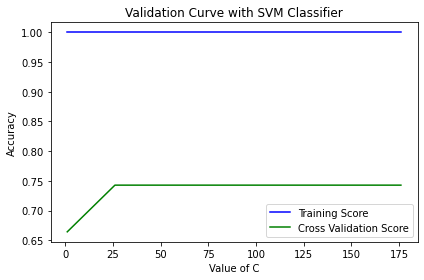

In [ ]:
from sklearn import svm
clf = svm.SVC()
model_evaluation(clf,XBOW_ngrams_train, yBOW_ngrams_train)
param_range = np.arange(1, 200, 25)
#param_range = np.logspace(-6, -1, 12)
plot_cv_indices(clf, XBOW_ngrams_train, yBOW_ngrams_train,"C", param_range ,  cv=10 ,model_name = "SVM")

Accuracy: 0.71 (+/- 0.09)
K-fold cross validation score: fo each  [0.64285714 0.74285714 0.78571429 0.64285714 0.71428571 0.72857143
 0.72857143 0.68571429 0.71428571 0.75714286]


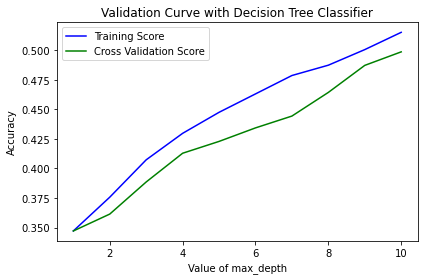

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfDT = DecisionTreeClassifier(random_state=0)
model_evaluation(clfDT, XBOW_ngrams_train, yBOW_ngrams_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfDT, XBOW_ngrams_train, yBOW_ngrams_train ,"max_depth", param_range ,  cv=10 ,model_name = "Decision Tree")

Accuracy: 0.49 (+/- 0.10)
K-fold cross validation score: fo each  [0.48571429 0.5        0.5        0.44285714 0.42857143 0.5
 0.58571429 0.5        0.54285714 0.41428571]


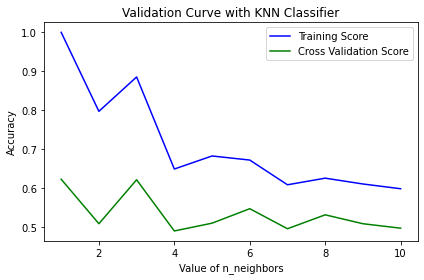

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN = KNeighborsClassifier(n_neighbors=4)
model_evaluation(clfKNN, XBOW_ngrams_train, yBOW_ngrams_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfKNN, XBOW_ngrams_train, yBOW_ngrams_train  ,"n_neighbors", param_range ,  cv=10 ,model_name = "KNN")

Accuracy: 0.87 (+/- 0.10)
K-fold cross validation score: fo each  [0.84285714 0.92857143 0.87142857 0.82857143 0.88571429 0.91428571
 0.78571429 0.92857143 0.8        0.91428571]


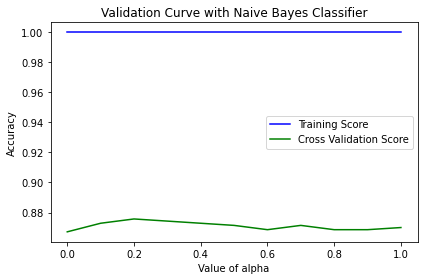

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfNB = MultinomialNB()
model_evaluation(clfNB, XBOW_ngrams_train, yBOW_ngrams_train,cv=10)
param_range = np.arange(0, 1.1, 0.1)
plot_cv_indices(clfNB,XBOW_ngrams_train, yBOW_ngrams_train ,"alpha", param_range ,  cv=10 ,model_name = "Naive Bayes")

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(BOWs)
#TfidfVectorizer(stop_words='english', max_features=200)
X_train_tf = tf_transformer.transform(BOWs).toarray()

X_train_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_frame['TF-IDF'] = list(X_train_tf)

In [ ]:
data_frame

,sentences,Words,Authors_Names,BOW,BOW_n grams,TF-IDF
0,every assurance wish settle country circle cho...,"[every, assurance, wish, settle, country, circ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,dignity grace love blooming sweetness artless ...,"[dignity, grace, love, blooming, sweetness, ar...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,write sure incapable wad however open packet s...,"[write, sure, incapable, wad, however, open, p...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,dwelt Jane Fairfax receive attention Elton nob...,"[dwelt, Jane, Fairfax, receive, attention, Elt...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,lady account give one beyond nothing-meaning t...,"[lady, account, give, one, beyond, nothing-mea...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
995,Cecilia form design propose companion give pri...,"[Cecilia, form, design, propose, companion, gi...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,Cecilia Cecilia prize surely Cecilia whisper e...,"[Cecilia, Cecilia, prize, surely, Cecilia, whi...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,pay knew honest industrious little girl trust ...,"[pay, knew, honest, industrious, little, girl,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,Herculaneum give young English reader acquaint...,"[Herculaneum, give, young, English, reader, ac...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW,BOW_n grams,TF-IDF
64,half-whisper especially Elton's side avoid kno...,"[half-whisper, especially, Elton's, side, avoi...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
879,Case shrewd smile one sense land lease ten yea...,"[Case, shrewd, smile, one, sense, land, lease,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
644,Sammy Jay look Blacky Crow Blacky look Chatter...,"[Sammy, Jay, look, Blacky, Crow, Blacky, look,...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
829,part square spoke bought bought sugar-plums cr...,"[part, square, spoke, bought, bought, sugar-pl...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
649,ear wide open held _his_ breath little people ...,"[ear, wide, open, held, _his_, breath, little,...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
652,long thought one else right fish sure Bobby Co...,"[long, thought, one, else, right, fish, sure, ...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
422,round pant ask question Dodo answer without gr...,"[round, pant, ask, question, Dodo, answer, wit...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
105,party go see yet see old Abbey fish-ponds perh...,"[party, go, see, yet, see, old, Abbey, fish-po...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111,doubt love idea varied much first thought good...,"[doubt, love, idea, varied, much, first, thoug...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
np.array(df['TF-IDF'].iloc[0]).reshape((-1,1)).max()

0.3301539360056945

In [ ]:
import itertools
X_tfidf = df['TF-IDF'].to_numpy()
ytfidf = df.Authors_Names.to_numpy()
X_tfidf = add_padding(X_tfidf)
print (len(X_tfidf))
print (X_tfidf)
print (type(X_tfidf[0]))

1000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split


Xtfidf_train, Xtfidf_test, ytfidf_train, ytfidf_test = train_test_split(X_tfidf, ytfidf, random_state=42,test_size=0.3)
Xtfidf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Accuracy: 0.97 (+/- 0.04)
K-fold cross validation score: fo each  [1.         0.97142857 0.97142857 0.97142857 0.97142857 0.98571429
 0.94285714 0.94285714 0.98571429 1.        ]


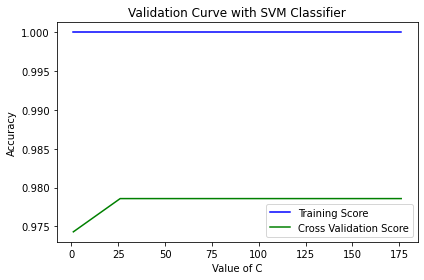

In [ ]:
from sklearn import svm
clftf = svm.SVC()
model_evaluation(clftf,Xtfidf_train, ytfidf_train)
param_range = np.arange(1, 200, 25)
#param_range = np.logspace(-6, -1, 12)
plot_cv_indices(clftf, Xtfidf_train, ytfidf_train,"C", param_range ,  cv=10 ,model_name = "SVM")

Accuracy: 0.87 (+/- 0.07)
K-fold cross validation score: fo each  [0.92857143 0.88571429 0.9        0.84285714 0.84285714 0.88571429
 0.8        0.88571429 0.85714286 0.82857143]


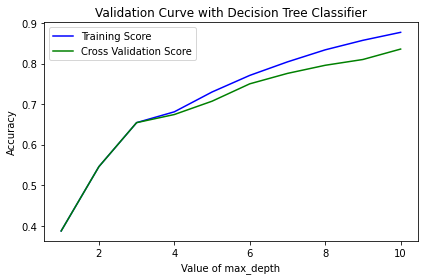

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfdt = DecisionTreeClassifier(random_state=0)
model_evaluation(clfdt,Xtfidf_train, ytfidf_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfdt, Xtfidf_train, ytfidf_train ,"max_depth", param_range ,  cv=10 ,model_name = "Decision Tree")

Accuracy: 0.93 (+/- 0.05)
K-fold cross validation score: fo each  [0.95714286 0.91428571 0.91428571 0.9        0.9        0.95714286
 0.9        0.94285714 0.95714286 0.91428571]


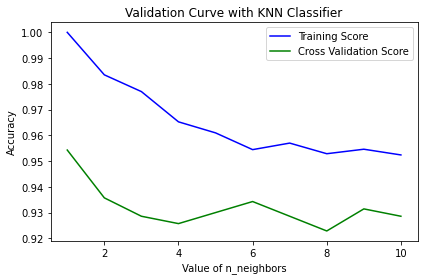

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clfknn = KNeighborsClassifier(n_neighbors=4)
model_evaluation(clfknn, Xtfidf_train, ytfidf_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfknn, Xtfidf_train, ytfidf_train ,"n_neighbors", param_range ,  cv=10 ,model_name = "KNN")

Accuracy: 0.97 (+/- 0.04)
K-fold cross validation score: fo each  [0.98571429 0.95714286 0.98571429 0.95714286 1.         0.98571429
 0.95714286 1.         0.95714286 0.94285714]


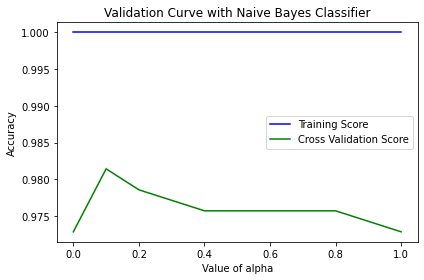

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfnb = MultinomialNB()
model_evaluation(clfnb,Xtfidf_train, ytfidf_train,cv=10)
param_range = np.arange(0, 1.1, 0.1)
plot_cv_indices(clfnb,Xtfidf_train, ytfidf_train ,"alpha", param_range ,  cv=10 ,model_name = "Naive Bayes")

# n-gram TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer_bigram = TfidfTransformer(use_idf=True).fit(BOWs_ngrams)
#TfidfVectorizer(stop_words='english', max_features=200)
X_train_tfbigram = tf_transformer_bigram.transform(BOWs_ngrams).toarray()

X_train_tfbigram

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_frame['TF-IDF Bigrams'] = list(X_train_tfbigram)

In [ ]:
data_frame

,sentences,Words,Authors_Names,BOW,BOW_n grams,TF-IDF,TF-IDF Bigrams
0,every assurance wish settle country circle cho...,"[every, assurance, wish, settle, country, circ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,dignity grace love blooming sweetness artless ...,"[dignity, grace, love, blooming, sweetness, ar...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,write sure incapable wad however open packet s...,"[write, sure, incapable, wad, however, open, p...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,dwelt Jane Fairfax receive attention Elton nob...,"[dwelt, Jane, Fairfax, receive, attention, Elt...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,lady account give one beyond nothing-meaning t...,"[lady, account, give, one, beyond, nothing-mea...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
995,Cecilia form design propose companion give pri...,"[Cecilia, form, design, propose, companion, gi...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,Cecilia Cecilia prize surely Cecilia whisper e...,"[Cecilia, Cecilia, prize, surely, Cecilia, whi...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,pay knew honest industrious little girl trust ...,"[pay, knew, honest, industrious, little, girl,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,Herculaneum give young English reader acquaint...,"[Herculaneum, give, young, English, reader, ac...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW,BOW_n grams,TF-IDF,TF-IDF Bigrams
848,manner Caroline finish round edge silver twist...,"[manner, Caroline, finish, round, edge, silver...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
100,heartily rejoice light cheerful unsentimental ...,"[heartily, rejoice, light, cheerful, unsentime...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
759,course hit ground pretty hard second quite los...,"[course, hit, ground, pretty, hard, second, qu...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
125,month since Campbell married impression little...,"[month, since, Campbell, married, impression, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
292,Gingerbread Boy quarter go next minute half go...,"[Gingerbread, Boy, quarter, go, next, minute, ...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
76,opening lip arrive carriage turn step let Elto...,"[opening, lip, arrive, carriage, turn, step, l...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
541,business Duchess hoarse growl world go round d...,"[business, Duchess, hoarse, growl, world, go, ...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
909,instant barking increase fury He'll break chai...,"[instant, barking, increase, fury, He'll, brea...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
603,Billy Mink Billy look Little Joe Otter minute ...,"[Billy, Mink, Billy, look, Little, Joe, Otter,...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
import itertools
X_tfidfbigram = df['TF-IDF Bigrams'].to_numpy()
ytfidfbigram = df.Authors_Names.to_numpy()
X_tfidfbigram = add_padding(X_tfidfbigram)
print (len(X_tfidfbigram))
print (X_tfidfbigram)
print (type(X_tfidfbigram[0]))

1000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split


Xtfidfbigram_train, Xtfidfbigram_test, ytfidfbigram_train, ytfidfbigram_test = train_test_split(X_tfidfbigram, ytfidfbigram, random_state=42,test_size=0.3)
Xtfidfbigram_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Accuracy: 0.85 (+/- 0.07)
K-fold cross validation score: fo each  [0.8        0.87142857 0.8        0.82857143 0.84285714 0.87142857
 0.82857143 0.84285714 0.85714286 0.91428571]


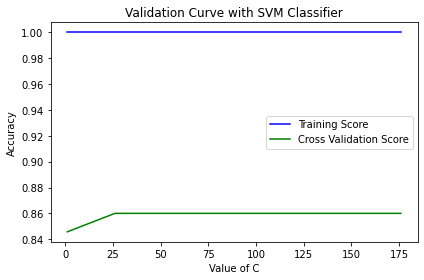

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
model_evaluation(clf,Xtfidfbigram_train, ytfidfbigram_train)
param_range = np.arange(1, 200, 25)
#param_range = np.logspace(-6, -1, 12)
plot_cv_indices(clf, Xtfidfbigram_train, ytfidfbigram_train,"C", param_range ,  cv=10 ,model_name = "SVM")

Accuracy: 0.71 (+/- 0.11)
K-fold cross validation score: fo each  [0.68571429 0.71428571 0.81428571 0.75714286 0.72857143 0.68571429
 0.71428571 0.6        0.67142857 0.72857143]


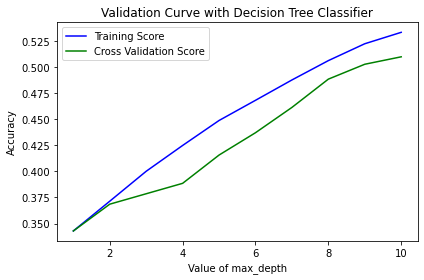

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfDT = DecisionTreeClassifier(random_state=0)
model_evaluation(clfDT,Xtfidfbigram_train, ytfidfbigram_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfDT, Xtfidfbigram_train, ytfidfbigram_train ,"max_depth", param_range ,  cv=10 ,model_name = "Decision Tree")

Accuracy: 0.81 (+/- 0.08)
K-fold cross validation score: fo each  [0.7        0.82857143 0.82857143 0.8        0.82857143 0.85714286
 0.81428571 0.84285714 0.78571429 0.82857143]


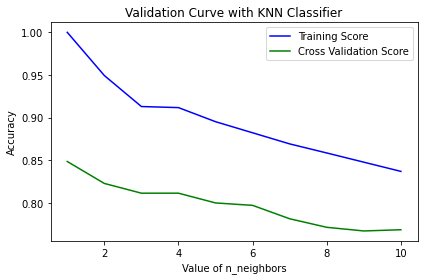

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN = KNeighborsClassifier(n_neighbors=4)
model_evaluation(clfKNN, Xtfidfbigram_train, ytfidfbigram_train,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfKNN, Xtfidfbigram_train, ytfidfbigram_train ,"n_neighbors", param_range ,  cv=10 ,model_name = "KNN")

Accuracy: 0.87 (+/- 0.08)
K-fold cross validation score: fo each  [0.81428571 0.85714286 0.87142857 0.81428571 0.91428571 0.91428571
 0.9        0.92857143 0.85714286 0.87142857]


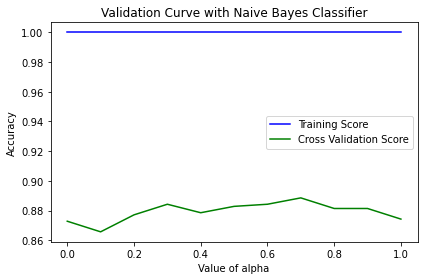

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfNB = MultinomialNB()
model_evaluation(clfNB,Xtfidfbigram_train, ytfidfbigram_train,cv=10)
param_range = np.arange(0, 1.1, 0.1)
plot_cv_indices(clfNB,Xtfidfbigram_train, ytfidfbigram_train ,"alpha", param_range ,  cv=10 ,model_name = "Naive Bayes")

# Plot the models scores

Text(0, 0.5, 'Models')

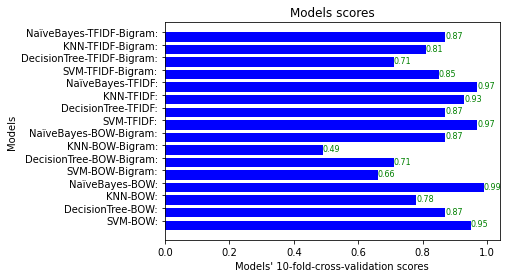

In [ ]:
models = ["SVM-BOW:","DecisionTree-BOW:", "KNN-BOW:","NaïveBayes-BOW:","SVM-BOW-Bigram:","DecisionTree-BOW-Bigram:"
,"KNN-BOW-Bigram:","NaïveBayes-BOW-Bigram:","SVM-TFIDF:","DecisionTree-TFIDF:","KNN-TFIDF:","NaïveBayes-TFIDF:","SVM-TFIDF-Bigram:"
,"DecisionTree-TFIDF-Bigram:","KNN-TFIDF-Bigram:","NaïveBayes-TFIDF-Bigram:"]
accuracies = [0.95,0.87, 0.78, 0.99, 0.66, 0.71, 0.49 , 0.87, 0.97 , 0.87, 0.93, 0.97 , 0.85  , 0.71,  0.81,0.87  ]

x = models
y = accuracies

fig, ax = plt.subplots()    
width = 0.75

ind = np.arange(len(y))  
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v, i-0.1 , str(v), color='green', fontSize='8')
plt.title('Models scores')
plt.xlabel('Models\' 10-fold-cross-validation scores')
plt.ylabel('Models')

# Champion Model Training and Testing

score =  99.33333333333333
[[62  0  0  0  0]
 [ 0 47  1  0  0]
 [ 0  0 67  0  0]
 [ 1  0  0 61  0]
 [ 0  0  0  0 61]]


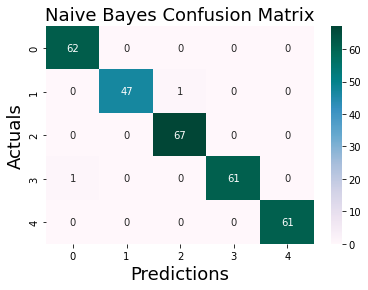

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.98      0.99        48
           2       0.99      1.00      0.99        67
           3       1.00      0.98      0.99        62
           4       1.00      1.00      1.00        61

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfnb = MultinomialNB(alpha=0.2).fit(XBow_train, yBow_train)
#Xtfidf_train, Xtfidf_test, ytfidf_train, ytfidf_test 
y_pred=clfnb.predict(XBow_test)
print("score = ",clfnb.score(XBow_test,yBow_test)*100)
confusion_matrix_binary_classes(yBow_test,y_pred)